In [2]:
import numpy as np

λ = 2.0  # fixation de la valeur λ
sample_sizes = [50, 100, 1000, 10000]
num_samples = 10**5

results = {}
for n in sample_sizes:
    # Générer 10⁵ échantillons de taille n avec loi Poisson(λ)
    samples = np.random.poisson(λ, size=(num_samples, n))
    # Calculer la moyenne de chaque échantillon
    lambda_hat = samples.mean(axis=1)
    results[n] = lambda_hat

In [3]:
for n in sample_sizes:
    lambda_hat = results[n]
    empirical_var = np.var(lambda_hat)
    theoretical_var = λ / n
    
    print(f"n = {n}:")
    print(f"  Variance empirique: {empirical_var:.6f}")
    print(f"  Variance théorique (λ/n): {theoretical_var:.6f}")
    print(f"  Ratio: {empirical_var/theoretical_var:.4f}")

n = 50:
  Variance empirique: 0.040069
  Variance théorique (λ/n): 0.040000
  Ratio: 1.0017
n = 100:
  Variance empirique: 0.019946
  Variance théorique (λ/n): 0.020000
  Ratio: 0.9973
n = 1000:
  Variance empirique: 0.002011
  Variance théorique (λ/n): 0.002000
  Ratio: 1.0055
n = 10000:
  Variance empirique: 0.000200
  Variance théorique (λ/n): 0.000200
  Ratio: 0.9997


In [4]:
α = 1.0  # paramètres du prior
β = 1.0

for n in sample_sizes:
    samples = np.random.poisson(λ, size=(num_samples, n))
    sum_X = samples.sum(axis=1)
    lambda_bayes = (α + sum_X) / (β + n)
    
    # Calcul du MSE
    mse = np.mean((lambda_bayes - λ)**2)
    print(f"n = {n}, MSE Bayesien: {mse:.6f}")
    
    # Comparaison avec le MLE
    lambda_mle = samples.mean(axis=1)
    mle_mse = np.mean((lambda_mle - λ)**2)
    print(f"   MSE MLE: {mle_mse:.6f}")

n = 50, MSE Bayesien: 0.038500
   MSE MLE: 0.039632
n = 100, MSE Bayesien: 0.019741
   MSE MLE: 0.020046
n = 1000, MSE Bayesien: 0.001978
   MSE MLE: 0.001981
n = 10000, MSE Bayesien: 0.000199
   MSE MLE: 0.000199


In [5]:
c = 1.5  # seuil de troncature

for n in sample_sizes:
    lambda_hat = results[n]
    lambda_trunc = np.maximum(lambda_hat, c)
    
    bias = np.mean(lambda_trunc) - λ
    variance = np.var(lambda_trunc)
    mse = np.mean((lambda_trunc - λ)**2)
    
    print(f"n = {n}, Estimateur tronqué:")
    print(f"  Biais: {bias:.6f}")
    print(f"  Variance: {variance:.6f} (vs {λ/n:.6f} pour MLE)")
    print(f"  MSE: {mse:.6f}")

n = 50, Estimateur tronqué:
  Biais: -0.000288
  Variance: 0.039754 (vs 0.040000 pour MLE)
  MSE: 0.039754
n = 100, Estimateur tronqué:
  Biais: 0.000157
  Variance: 0.019942 (vs 0.020000 pour MLE)
  MSE: 0.019942
n = 1000, Estimateur tronqué:
  Biais: -0.000024
  Variance: 0.002011 (vs 0.002000 pour MLE)
  MSE: 0.002011
n = 10000, Estimateur tronqué:
  Biais: -0.000041
  Variance: 0.000200 (vs 0.000200 pour MLE)
  MSE: 0.000200


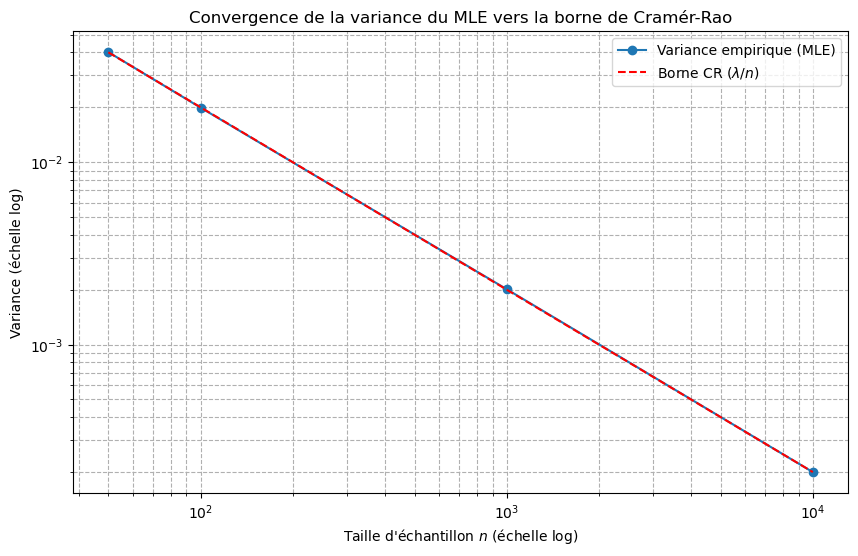

In [2]:
import matplotlib.pyplot as plt
import numpy as np

λ = 2.0
sample_sizes = np.array([50, 100, 1000, 10000])
mle_variances = [np.var(np.mean(np.random.poisson(λ, (10**5, n)), axis=1)) for n in sample_sizes]

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, mle_variances, 'o-', label='Variance empirique (MLE)')
plt.plot(sample_sizes, λ / sample_sizes, 'r--', label=r'Borne CR ($\lambda/n$)')
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Taille d\'échantillon $n$ (échelle log)')
plt.ylabel('Variance (échelle log)')
plt.title('Convergence de la variance du MLE vers la borne de Cramér-Rao')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('convergence_mle.pdf', bbox_inches='tight')

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_18701/1757183370.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(λ, color='k', linestyle='--', label='Vraie valeur $\lambda$')
/tmp/ipykernel_18701/1757183370.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Estimation de $\lambda$')


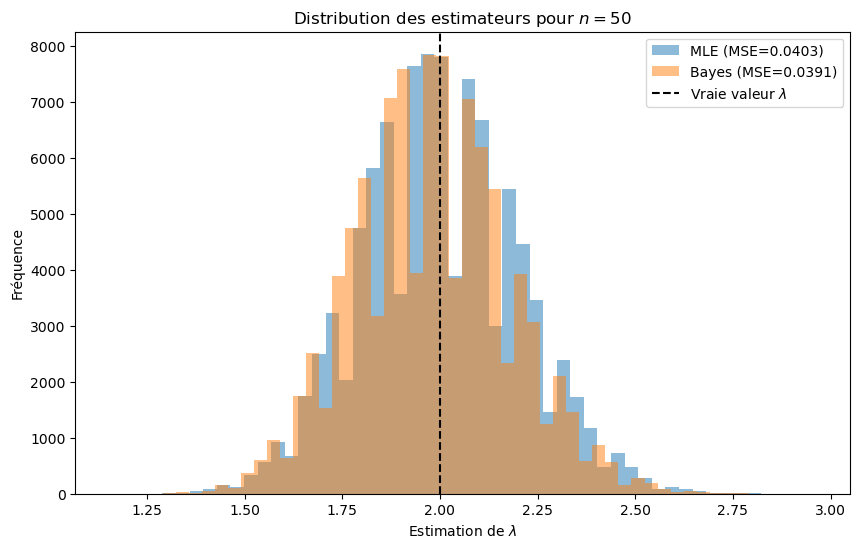

In [3]:
n = 50  # Petit échantillon pour voir l'effet
α, β = 1.0, 1.0
mle = np.mean(np.random.poisson(λ, (10**5, n)), axis=1)
bayes = (α + np.sum(np.random.poisson(λ, (10**5, n)), axis=1)) / (β + n)

plt.figure(figsize=(10, 6))
plt.hist(mle, bins=50, alpha=0.5, label=f'MLE (MSE={np.mean((mle-λ)**2):.4f})')
plt.hist(bayes, bins=50, alpha=0.5, label=f'Bayes (MSE={np.mean((bayes-λ)**2):.4f})')
plt.axvline(λ, color='k', linestyle='--', label='Vraie valeur $\lambda$')
plt.xlabel('Estimation de $\lambda$')
plt.ylabel('Fréquence')
plt.title('Distribution des estimateurs pour $n=50$')
plt.legend()
plt.savefig('mse_comparison.pdf', bbox_inches='tight')

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_18701/162952541.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Estimation de $\lambda$')


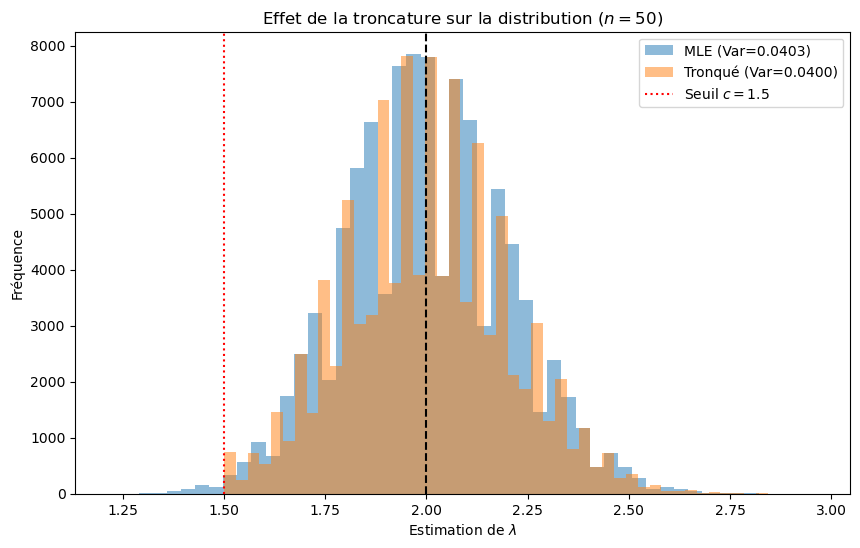

In [4]:
c = 1.5  # Seuil de troncature
trunc = np.maximum(mle, c)

plt.figure(figsize=(10, 6))
plt.hist(mle, bins=50, alpha=0.5, label=f'MLE (Var={np.var(mle):.4f})')
plt.hist(trunc, bins=50, alpha=0.5, label=f'Tronqué (Var={np.var(trunc):.4f})')
plt.axvline(λ, color='k', linestyle='--')
plt.axvline(c, color='r', linestyle=':', label='Seuil $c=1.5$')
plt.xlabel('Estimation de $\lambda$')
plt.ylabel('Fréquence')
plt.title('Effet de la troncature sur la distribution ($n=50$)')
plt.legend()
plt.savefig('troncature_effect.pdf', bbox_inches='tight')